In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# PIL to open & manipulate images
from PIL import Image, ImageOps, ImageChops

# for messages in loops
from IPython.display import clear_output

# to save arrays
import h5py

# for folder-timestamp
from datetime import datetime

# for train/test split
from sklearn.model_selection import train_test_split
# for one-hot encoding
from sklearn.preprocessing import LabelBinarizer
# for class weights
from sklearn.utils import class_weight
# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
# for efficient loops
import itertools

# keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import HDF5Matrix
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, Lambda, Activation, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import callbacks

In [2]:
def crps(y_true, y_pred):
    diff = (y_true - y_pred)
    diff_2 = K.square(diff)
    loss = K.mean(diff_2)
    return loss

In [3]:
img_test = HDF5Matrix('/data/joint_scoring/img_test_regression.h5', 'img_test_regression')
img_test.shape

(19709, 150, 150, 1)

In [4]:
model = load_model("/data/joint_scoring/models/20171104_135018.h5", custom_objects={'crps': crps})

In [5]:
p = model.predict(img_test)
print(p.shape)

pred = np.zeros(p.shape[0])
print(pred.shape)

for i in range(p.shape[0]):
    pred[i] = sum(1 - p[i])

(19709, 101)
(19709,)


In [6]:
with h5py.File('/data/joint_scoring/img_test_regression.h5', 'r') as hf:
    img_test = hf['img_test_regression'][:]
print(img_test.shape)
    
with h5py.File('/data/joint_scoring/labels_test_regression.h5', 'r') as hf:
    labels_test = hf['labels_test_regression'][:]
print(labels_test.shape)

(19709, 150, 150, 1)
(19709,)


(127, 150, 150, 1)


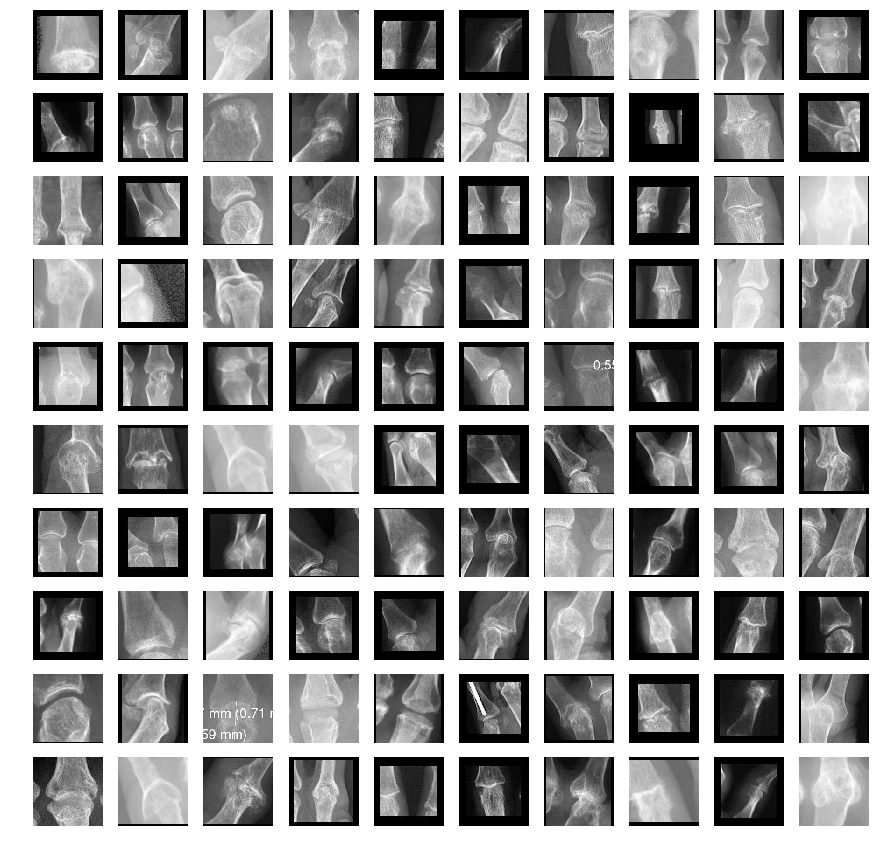

In [8]:
wrong = img_test[np.abs(pred - labels_test) > 55]
print(wrong.shape)

f, axarr = plt.subplots(10, 10, figsize=(15,15))
k = 1

for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(wrong[k].squeeze(), cmap='gray')
        axarr[i, j].axis('off')
        k = k + 1

plt.show()

(128, 150, 150, 1)


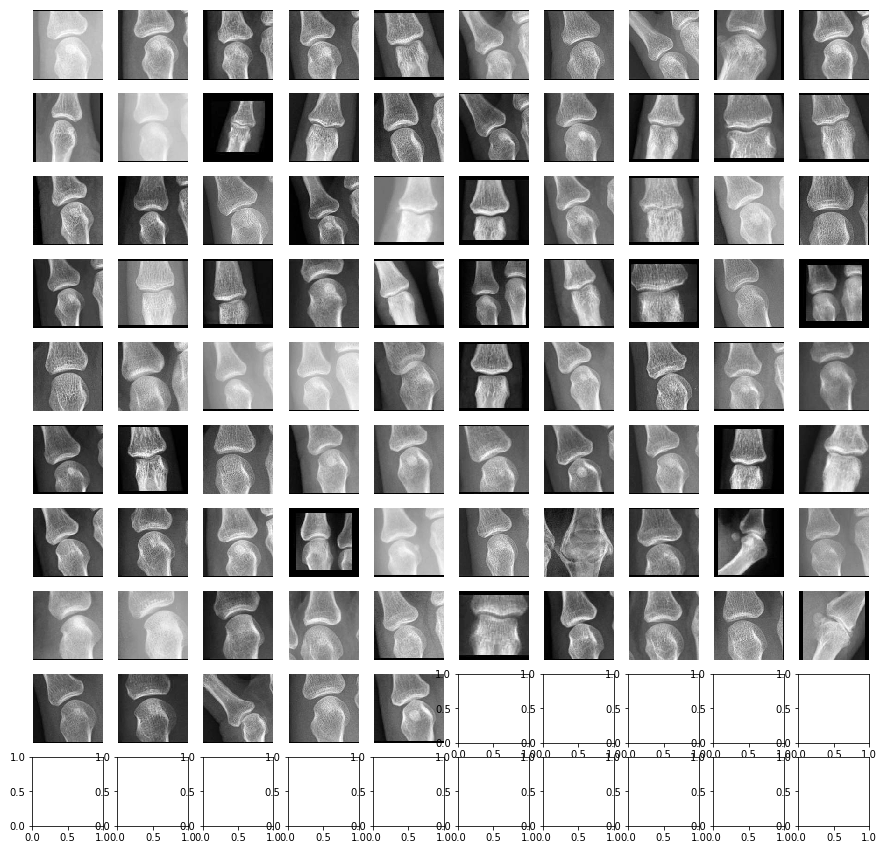

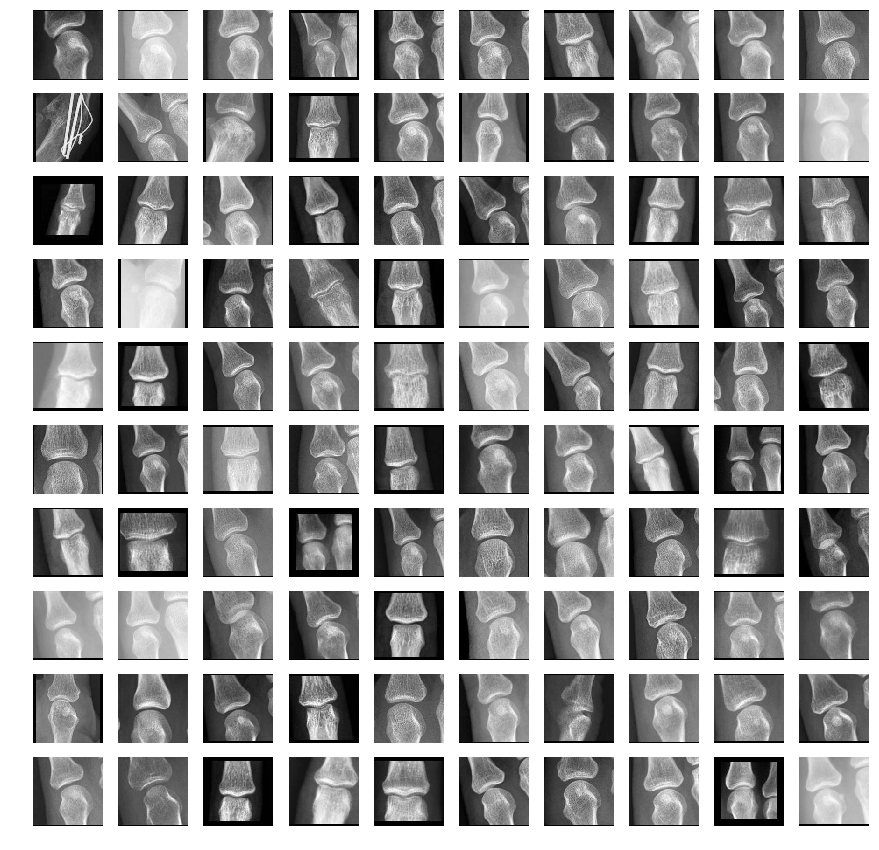

In [15]:
correct = img_test[np.abs(pred - labels_test) < 0.015]
print(correct.shape)

f, axarr = plt.subplots(10, 10, figsize=(15,15))
k = 1

for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(correct[k].squeeze(), cmap='gray')
        axarr[i, j].axis('off')
        k = k + 1

plt.show()